### In this notebook, I am gonna show you how easy it is to make a neural network. During the course of this notebook, we will solve a famous classification problem **"Titanic Survival"**. 

#### <center>Give me some confidence by upvoting this notebook 🙌..<center>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')

df_test = pd.read_csv('../input/titanic/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Meaning

1. Pclass: Ticket (class	1 = 1st, 2 = 2nd, 3 = 3rd)
2. SibSp: # of siblings / spouses aboard the Titanic
3. Parch: # of parents / children aboard the Titanic
4. Fare: Passenger fare
5. Cabin: Cabin number
6. Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
7. Survived: Survival	0 = No, 1 = Yes


## Basic Data Analysis.

In [3]:
print(df_train.shape)

print(df_train.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Age, Cabin and embarked columns contain some null values. So we need to carefully handle that as neural networks don't work with missing data.

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

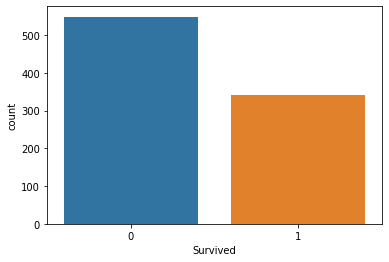

In [6]:
sns.countplot(df_train['Survived'], data = df_train)

### The dataset is almost balanced!

<AxesSubplot:>

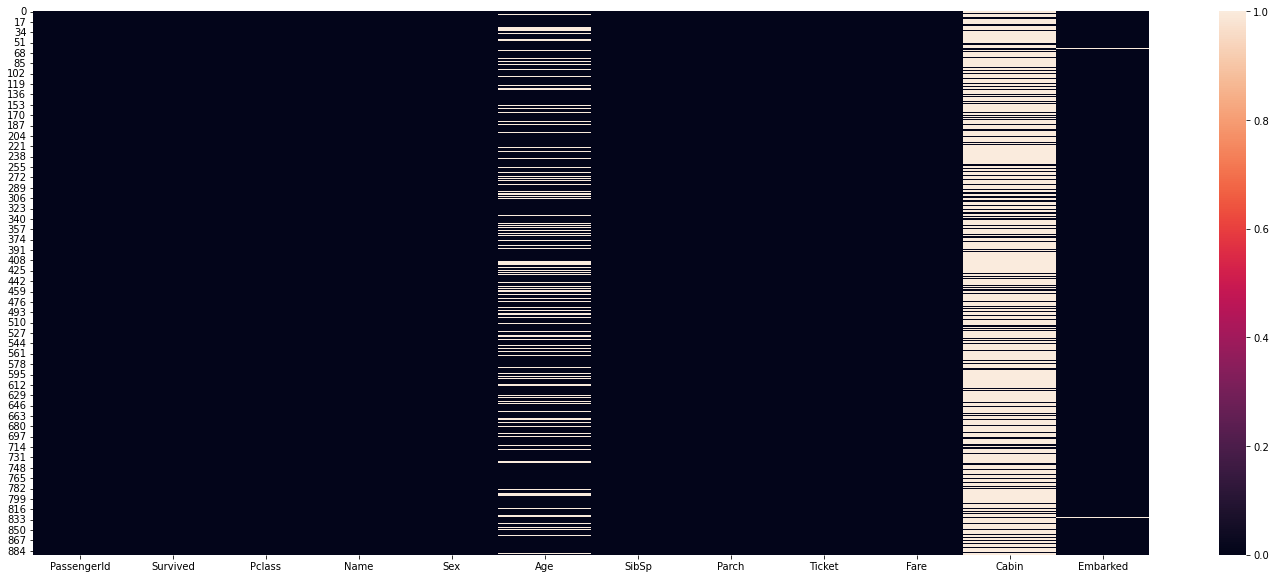

In [7]:
# Let's visualize the missing values.

plt.figure(figsize = (25, 10))

sns.heatmap(df_train.isnull())

### Handling the missing values

In [8]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

df_train['Embarked'] = df_train['Embarked'].fillna('Q')
df_test['Embarked'] = df_test['Embarked'].fillna('Q')

df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

# And then lets convert some columns to int64

df_train['Fare'] = df_train['Fare'].astype(int)
df_test['Fare'] = df_test['Fare'].astype(int)

df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)


# Let's drop the Cabin column because it has many missing values

df_train = df_train.drop(columns = ['Cabin'])
df_test = df_test.drop(columns = ['Cabin'])

# Also i am dropping ticket column because it doesn't effecting the output.

df_train =  df_train.drop(columns = ['Ticket'])
df_test = df_test.drop(columns = ['Ticket'])

### Normalizing and Standardizing the data.

<AxesSubplot:xlabel='Age', ylabel='Density'>

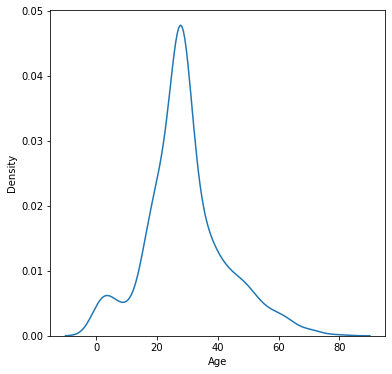

In [9]:
plt.figure(figsize = (6, 6))

# Age column is already normalized as you can see in the graph below.
sns.kdeplot(x = df_train['Age'], data = df_train)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

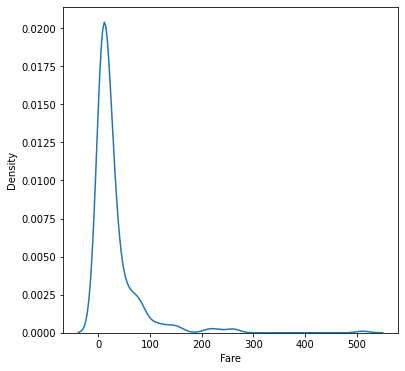

In [10]:
plt.figure(figsize = (6, 6))

# Fare column is not normalized, so we need to normalized it first. Because neural network works with normalized data.
sns.kdeplot(x = df_train['Fare'], data = df_train)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

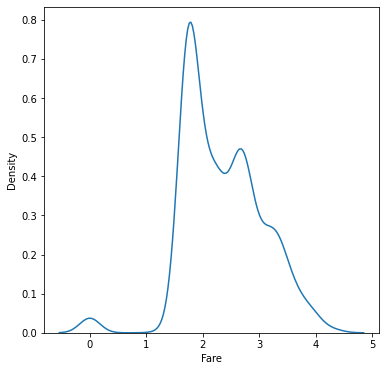

In [11]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

df_train['Fare'] = df_train['Fare'].clip(1, max(df_train['Fare']))
df_train['Fare'] = stats.boxcox(df_train['Fare'])[0]

df_test['Fare'] = df_test['Fare'].clip(1, max(df_test['Fare']))
df_test['Fare'] = stats.boxcox(df_test['Fare'])[0]

plt.figure(figsize = (6, 6))

# Fare column is not normalized, so we need to normalized it first. Because neural network works with normalized data.
sns.kdeplot(x = df_train['Fare'], data = df_train)


/opt/conda/lib/python3.7/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


<AxesSubplot:xlabel='Age', ylabel='Density'>

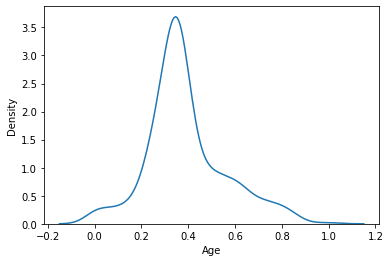

In [12]:
# One final step: Let's scale the age and fare column.

df_train['Fare'] = minmax_scaling(df_train['Fare'], columns = [0])
df_test['Fare'] = minmax_scaling(df_test['Fare'], columns = [0])

df_train['Age'] = minmax_scaling(df_train['Age'], columns = [0])
df_test['Age'] = minmax_scaling(df_test['Age'], columns = [0])

sns.kdeplot(x = df_test['Age'], data = df_test)

### Let's do some feature engineering and find out which features are important and which are not.

**Question: I am dropping the Name and PassengerId column from the dataset. If you know the answer post a comment so that everyone can see your answer!**

In [13]:
df_train = df_train.drop(columns = ['Name'])
df_test = df_test.drop(columns = ['Name'])

df_train = df_train.drop(columns = ['PassengerId'])
df_test = df_test.drop(columns = ['PassengerId'])

In [14]:
# By hit and trial method i found that sex is the most important feature, take a look at the below plot for explanation!

print(df_train['Sex'].value_counts())


male      577
female    314
Name: Sex, dtype: int64


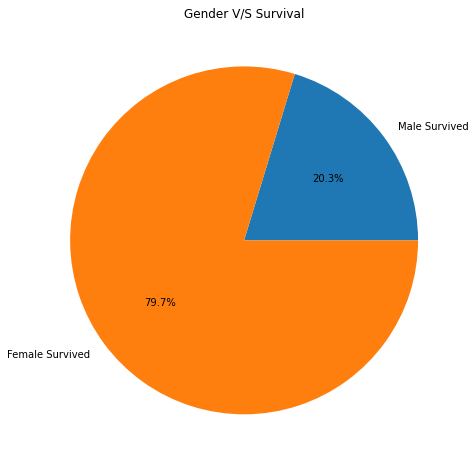

In [15]:
total_male = 577

total_female = 314

total_male_survived = len(df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)])

total_female_survived = len(df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)])

male_survival_percentage = (total_male_survived / total_male) * 100

female_survival_percentage = (total_female_survived / total_female ) * 100

print()

y = np.array([male_survival_percentage, female_survival_percentage])

plt.figure(figsize = (8, 8))

plt.title("Gender V/S Survival")

plt.pie(y, labels = ['Male Survived', 'Female Survived'], autopct='%1.1f%%')

plt.show()

### Let's encode the Sex column into numeric value.

In [16]:
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

In [17]:
from sklearn.feature_selection import mutual_info_classif

discrete_features = df_train.dtypes == int

y = df_train['Survived']

df_train = df_train.drop(columns = ['Survived'])


def make_mi_scores(X, y, discrete_features):
    
    mi_scores = mutual_info_classif(X, y, random_state = 0)
    
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    
    mi_scores = mi_scores.sort_values(ascending = False)
    
    return mi_scores


mi_scores = make_mi_scores(df_train.select_dtypes(include=['int64']), y, discrete_features)

mi_scores

Sex         0.137586
Pclass      0.059235
SibSp       0.048427
Parch       0.027421
Embarked    0.012071
Name: MI Scores, dtype: float64

### So, our model will be trained on columns sex, pclass, age, parch, sibsp, fare and embarked.

## Let's build our very own neural network 🔥.

In [18]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    layers.Dense(8, activation = 'relu', input_shape = (7,)),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model.summary()


model.compile(
    
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
    
)

X_train = np.asarray(df_train).astype(np.int)

y_train = np.asarray(y).astype(np.int)


history = model.fit(
    
    X_train, y_train,
    epochs = 100,
    verbose = 0,
)


2022-12-07 07:17:34.496610: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. Wh

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


## Our Model is ready to be evaluated!

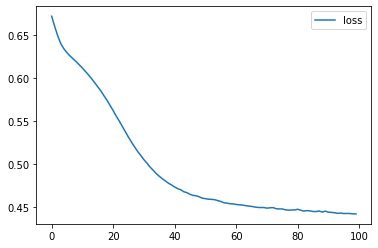

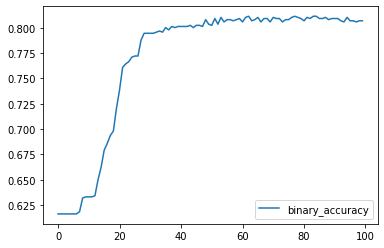

In [19]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()
history_frame.loc[:, ['binary_accuracy']].plot();

### So our very basic neural network reached the accuracy of almost 82%.

#### Please upvote this notebook if you found it useful.